# Lab 6

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
from typing import Dict, List, Optional, cast

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
L = len("Artur")
F = len("Morys")
N = (L + F) * 100

seed = 1302971248

N

1000

In [3]:
def runModel(name: str, inputData: Dict = {}, sampling: int = 1):
    model = CmdStanModel(stan_file=f'{name}.stan')

    data = model.sample(
        data={
            "N": N,
            **inputData
        },
        chains=1,
        refresh=sampling,
        iter_sampling=sampling,
        iter_warmup=0,
        seed=seed,
        fixed_param=True,
        show_console=False
    )

    return model, data

## Ad 1

In [4]:
model1, data1 = runModel("code_1")
data1.draws_pd().head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[991],y[992],y[993],y[994],y[995],y[996],y[997],y[998],y[999],y[1000]
0,0.0,0.0,0.01,-0.087927,0.019895,0.545759,0.686026,0.0958,0.156341,0.646472,...,-0.396902,-1.25618,-0.0056,-1.00437,0.810791,0.241955,-0.767415,0.01041,-0.31249,1.0068


## Ad 2

In [5]:
model2, data2 = runModel("code_2")
data2.draws_pd().head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[991],y[992],y[993],y[994],y[995],y[996],y[997],y[998],y[999],y[1000]
0,0.0,0.0,-2.17334,-0.087407,-0.962163,-2.07787,1.3079,-1.38811,-0.659995,-0.408727,...,0.55021,-0.526895,1.7653,2.60013,2.26094,-0.859553,-1.04236,2.16391,-1.66239,1.86726


## Ad 3

In [6]:
model3, data3 = runModel(
    "code_3", 
    inputData={
        "y": data1.draws_pd().loc[0, "y[1]" : f"y[{N}]"].values
    },
    sampling=1000
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


## Ad 4

In [7]:
model4, data4 = runModel(
    "code_4", 
    inputData={
        "y": data1.draws_pd().loc[0, "y[1]" : f"y[{N}]"].values
    },
    sampling=1000
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


## Comparison of models 3 & 4

In [8]:
fit3 = az.from_cmdstanpy(posterior=data3)
fit3

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [9]:
fit4 = az.from_cmdstanpy(posterior=data4)
fit4

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Text(0.5, 1.0, 'LOO comparison')

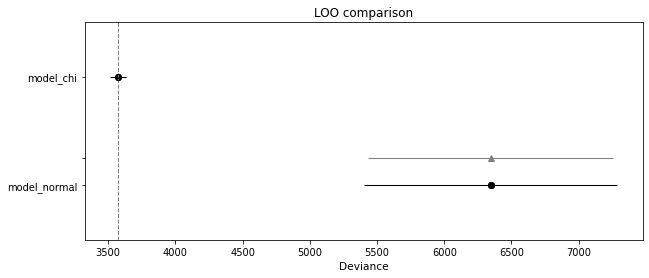

In [12]:
looComparison = az.compare(
    {
        "model_normal": fit3,
        "model_chi": fit4
    },
    ic="loo",
    scale="deviance"
)

plt.figure(figsize=(10, 4))
az.plot_compare(looComparison, ax=plt.gca())
plt.title("LOO comparison")

Text(0.5, 1.0, 'WAIC comparison')

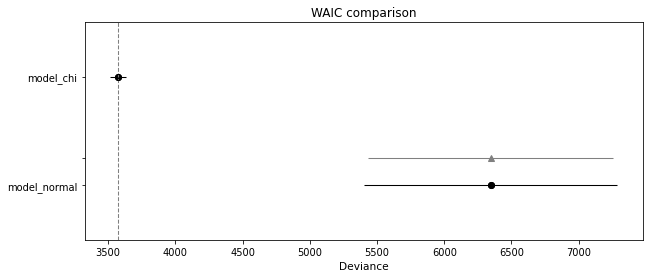

In [13]:
waicComparison = az.compare(
    {
        "model_normal": fit3,
        "model_chi": fit4
    },
    ic="waic",
    scale="deviance"
)

plt.figure(figsize=(10, 4))
az.plot_compare(waicComparison, ax=plt.gca())
plt.title("WAIC comparison")

## Ad 5

In [15]:
data5 = []
for i in range(1, 4):
    model5_i, data5_i = runModel(
        "code_5", 
        inputData={
            "K": i,
            "y": data1.draws_pd().loc[0, "y[1]" : f"y[{N}]"].values,
            "X": data2.draws_pd().loc[:, "X[1,1]": f"X[{N},{i}]"].values.reshape((N, i))
        },
        sampling=1000
    )

    data5.append(data5_i)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [16]:
for i, data in enumerate(data5):
    fit = az.from_cmdstanpy(posterior=data)

    print(f"Model consisting of {i + 1} predictors")
    print(az.loo(fit, pointwise=True))
    print()

Model consisting of 1 predictors


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 by 1000 log-likelihood matrix

         Estimate       SE
elpd_loo -3183.30   510.61
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1000  100.0%


Model consisting of 2 predictors
Computed from 1000 by 1000 log-likelihood matrix

         Estimate       SE
elpd_loo -3247.80   501.01
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1000  100.0%




/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Model consisting of 3 predictors
Computed from 1000 by 1000 log-likelihood matrix

         Estimate       SE
elpd_loo -3566.04   509.98
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1000  100.0%




/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

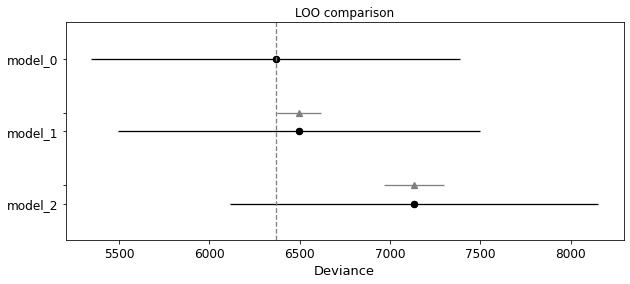

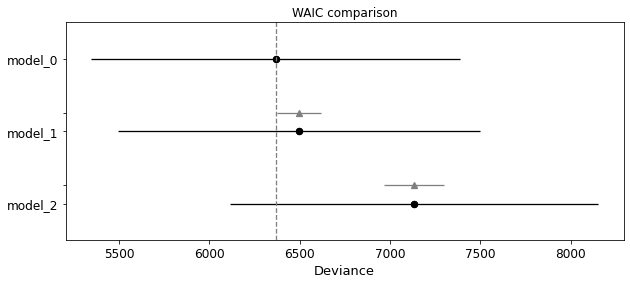

In [18]:
comparisonDict = { f"model_{tup[0]}": tup[1] for tup in enumerate(data5) }

looComparison = az.compare(
    comparisonDict,
    ic="loo",
    scale="deviance"
)

plt.figure(figsize=(10, 4))
az.plot_compare(looComparison, ax=plt.gca())
plt.title("LOO comparison")


waicComparison = az.compare(
    comparisonDict,
    ic="waic",
    scale="deviance"
)

plt.figure(figsize=(10, 4))
az.plot_compare(waicComparison, ax=plt.gca())
_ = plt.title("WAIC comparison")